In [3]:
##### IMPORTS #####

from sklearn import datasets
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
import seaborn as sns
import pandas as pd #for df
import matplotlib.pyplot as plt #for plotting
import tensorflow as tf
from sklearn.preprocessing import scale
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from tensorflow.keras.datasets import mnist
from collections import Counter

In [4]:
##### LOAD DATA #####

(train_images, train_labels), (_, _) = mnist.load_data()


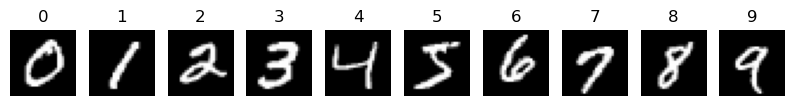

In [5]:
##### DISPLAY ONE EXAMPLE OF EACH CLASS #####

#digit dict
digit_indices = {}

for i, label in enumerate(train_labels):
    #store each unseen class once
    if label not in digit_indices:
        digit_indices[label] = i


plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i + 1) #(num of rows, num of columns, iterate)
    plt.imshow(train_images[digit_indices[i]], cmap='gray')
    plt.title(i)
    plt.axis('off')
plt.show()


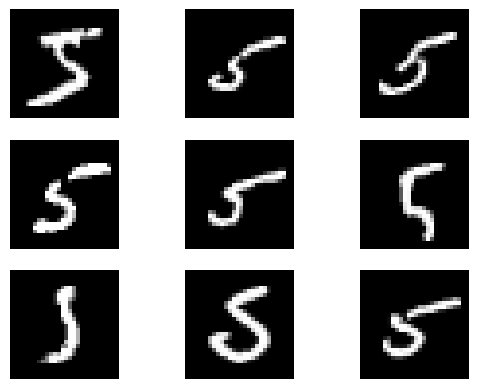

In [8]:
##### DISPLAY VARIATION IN HANDWRITING OF ONE CLASS #####



# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()

# Filter out only the images with class 5
class_5_indices = [i for i, label in enumerate(trainy) if label == 5]
class_5_images = trainX[class_5_indices]

# Plot first few images of class 5
num_images_to_plot = 9
for i in range(num_images_to_plot):
    plt.subplot(330 + 1 + i)
    plt.imshow(class_5_images[i], cmap=plt.get_cmap('gray'))
    plt.axis('off')

# Show the plot
plt.show()

In [5]:
# Flattening each 28x28 image to a 2D array of 784 (28*28) elements for df
train_images = train_images.reshape(train_images.shape[0], -1)

#store in a panda df
df = pd.DataFrame(train_images)
#add column with labels
df['label'] = train_labels


In [6]:
#(rows = num of samples , columns = num of features (dimension) + label)
print(df.shape)

# Display first 5 rows
df.head()


(60000, 785)


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


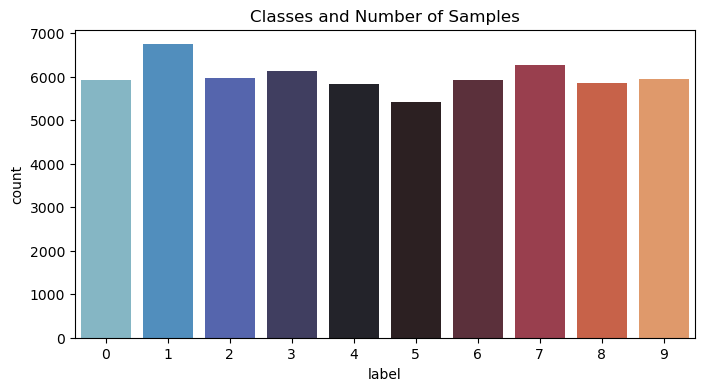

In [7]:
plt.figure(figsize=(8, 4))
sns.countplot(x='label', data=df, palette='icefire')
plt.title('Classes and Number of Samples')
plt.show()

In [8]:
#Save to CSV file
df.to_csv('mnist_data.csv', index=False)

data = pd.read_csv('mnist_data.csv')


In [9]:
X = df.iloc[:, :-1]  # Select all rows and all columns except the last one (the labels)
y = df.iloc[:, -1]   # Select all rows and only the last column


#Convert X into a numpy ndarray (2dimensional) for further data processing 
X = X.values
y = y.values

## Data Preprocessing

In [10]:
##### NORMALIZATION #####

#pixel values in gray scale images usually range from 0 to 255, so they can
#represent 256 (2^8) different shades of gray, we want to normalize the values 
#so that they range from 0 to 1

X = X.astype('float32')
X = X/255.0 


In [11]:
##### RESHAPE THE DATA #####


# 4D array 
#-1 automatically determines dimension, 
# 28 rows and 28 columns for the image pixels and 1 channel
X = X.reshape(X.shape[0],28,28,1)

print("X shape: ",X.shape)



X shape:  (60000, 28, 28, 1)


In [12]:
##### LABEL ENCODING #####


from keras.utils import to_categorical 

#one hot encoding
y = to_categorical(y, num_classes = 10)

print(y.shape)


(60000, 10)


In [13]:
##### SPLIT DATA SET #####

from sklearn.model_selection import train_test_split

# data will be shuffled before splitting
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# test and validation set
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, shuffle=True)

print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_test.shape)
print(y_valid.shape)


(48000, 28, 28, 1)
(6000, 28, 28, 1)
(6000, 28, 28, 1)
(48000, 10)
(6000, 10)
(6000, 10)


In [14]:
##### ANALYSIS OF CLASS DISTRIBUTION IN EACH DATA SET #####


import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# count of each class in all sets
y_train_counts = np.sum(y_train, axis=0)
y_valid_counts = np.sum(y_valid, axis=0)
y_test_counts = np.sum(y_test, axis=0)

# Calculate the size of the sets
size_y_train = len(y_train)
size_y_valid = len(y_valid)
size_y_test = len(y_test)

# Calculate the percentage of each class relative to the sample size
y_train_percentages = {cls: y_train_counts[cls] / size_y_train * 100 for cls in range(len(y_train_counts))}
y_valid_percentages = {cls: y_valid_counts[cls] / size_y_valid * 100 for cls in range(len(y_valid_counts))}
y_test_percentages = {cls: y_test_counts[cls] / size_y_test * 100 for cls in range(len(y_test_counts))}

# Sort the dictionaries based on the keys (class labels)
y_train_percentages_sorted = {cls: y_train_percentages[cls] for cls in sorted(y_train_percentages.keys())}
y_valid_percentages_sorted = {cls: y_valid_percentages[cls] for cls in sorted(y_valid_percentages.keys())}
y_test_percentages_sorted = {cls: y_test_percentages[cls] for cls in sorted(y_test_percentages.keys())}

print("Training set class percentages:")
for cls, percentage in y_train_percentages_sorted.items():
    print(f"Class {cls}: {percentage:.2f}%")

print("\nValidation set class percentages:")
for cls, percentage in y_valid_percentages_sorted.items():
    print(f"Class {cls}: {percentage:.2f}%")

print("\nTest set class percentages:")
for cls, percentage in y_test_percentages_sorted.items():
    print(f"Class {cls}: {percentage:.2f}%")




Training set class percentages:
Class 0: 9.89%
Class 1: 11.29%
Class 2: 9.97%
Class 3: 10.23%
Class 4: 9.72%
Class 5: 8.99%
Class 6: 9.88%
Class 7: 10.35%
Class 8: 9.77%
Class 9: 9.91%

Validation set class percentages:
Class 0: 9.52%
Class 1: 11.37%
Class 2: 10.40%
Class 3: 10.02%
Class 4: 9.63%
Class 5: 9.10%
Class 6: 9.53%
Class 7: 10.60%
Class 8: 9.92%
Class 9: 9.92%

Test set class percentages:
Class 0: 10.07%
Class 1: 10.67%
Class 2: 9.17%
Class 3: 10.30%
Class 4: 9.97%
Class 5: 9.30%
Class 6: 10.08%
Class 7: 11.05%
Class 8: 9.42%
Class 9: 9.98%
